# Prosjekt II
Av: Jakob 

## Hensikt
Målet med prosjektet er å moddellere smitte, utforske forskjellige smitte modeller, samt bruke modellene til å forså reele datasett. Jeg skal også se på sammenhengene mellom antall start smittede, kontaktrate, bedringsrate og grad av vaksinasjon

## Teori
##### Modell I:
En enkel modell for smittespredning av sykdommer kan finnes ved $$ I_{t+1} = I_t + aI_t $$ Der I er antall smittede individer, t er tid. Modellen viser at antall nye smittede kan finnes ved nåværende smittede pluss en konstant "a" ganget med antall smittede. "a" viser til hvor mange en gjennomsnittlig syk person smitter per uke. Det er viktig at kontakt raten har en enhet, her per uke, hvis ikke ville det ikke gitt mening, uten enhet ville smitten vært en sansynlighet for at du smittet noen, resten av livet ditt ikke bare når du er syk. Dette er en relativt enkelt modell for smittespredning. Den kan derfor passe til grove estimater, der man trenger en fungerende modell på kort tid. Modellen tar ikke hennsyn til: at syke individer ikke kan bli smittet igjen, at individer blir friske, at individer dør, forflyttningen til individene, vaksiner eller smittevern.
##### Modell II:
Vi kan videreutvikle modellen ved å legge inn mottaklige, S, som i praksis betyr at smittede ikke kan bli smittet igjen. Da kan utrykket for smittede være $$I_{t+1} = I_t + aI_tS_t$$ der $S_t$ er mottakelige vet et gitt tidspunkt. Over tid vil $S_t$ synke og flere av dem blir smittet. Det blir færre mottakelige for hver person som smittes. Dette gjør at smittespredningen avhenger både av antall smittede og hvor mange som fortsatt kan bli smittet.
##### Modell III:
Dersom vi legger til at individer blir friske så kan modellen finnes ved: $$I_{t+1} = I_t + aI_tS_t - bI_t$$ og antall friske vil være $$R_{t+1} = R_t + bI_t$$ Her vil b være bedringsrate, et tall for hvor stor anndel av syke individer som blir friske per uke. I praksis vil $ b = \frac{7}{\text{Antall tidsenheter (her: uker) du bruker på å bli frisk}}$. Dette er en relativt realistisk modell for hvordan smitte vil spre seg i en populasjon, hvis vi ser bort i fra vaksiner eller smittevern.
##### Modell IV:
Hvis vi antar at Vp% av befolkningen var vaksinert før utbruddet, så kan en modell for dette utrykkes ved $$V = P*\frac{\text{Vp}}{100}$$ $$S_0 = P-I-V$$ $$I_{t+1} = I_t + aI_tS_t - bI_t$$ $$R_{t+1} = R_t + bI_t$$ Vi reduserer altså bare antall mottakelige med 1-Vp%, dersom vi vaksinerer 100% av befolkningen, vil ingen være mottakelige. Denne modellen vil ha begrensinger, som for eksempel at det antas at populasjonen er vaksinert før utbruddet, ikke under, det er heller ikke tatt hensyn til at folk dør, eller holder seg hjemme fordi de er syke. Tids oppløsningen er også i uker, noe som kan gi ustabilt system.

### Bruk av AI
Jeg har skrevet eksplisitt der jeg har kopiert hele koden til AI, ChatGPT, eller endret koden. Jeg har også brukt ChatGPT til diverse feilsøking og forståelse av teori, men har da ikke kopiert det den kommer med, men heller endret det den anbefaler. Noen steder så har jeg kopiert enkelt linjer med kode som den har kommet med, men jeg har da passet på å forstå det den endrer. Jeg har også brukt ChatGPT til hjelp med bruk av biblioteker, for eksempel å endre farge i et plot
\
\
ChatGPT logg (Jeg har ikke brukt alt den har kommet med, mye av det den sa var ubrueklig og jeg har da valgt å gjøre det selv): https://chatgpt.com/share/67ab9f07-5870-8013-bf68-7b742007f9c6

## Oppstart:

Importerer biblioteker:

In [458]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import scipy as sp
import copy

Setter opp variabler og definisjoner:

In [459]:
def modell_en(a, start_smittede, P, t_slutt):
    t = 0
    I = start_smittede
    tider = []
    smittede = []
    while t <= t_slutt:
        I = I + a*I
        if I > P:
            I = P
        smittede.append(I)
        tider.append(t)
        t+=1
    tider = np.array(tider)
    smittede = np.array(smittede)
    return tider, smittede

def modell_to(a, start_smittede, P, t_slutt):
    t = 0
    I = start_smittede
    tider = []
    smittede = []
    mottakelige = []
    S = P-I
    while t <= t_slutt:
        I_old = copy.deepcopy(I)
        I = I_old + a*I_old*(S / P)
        S = S-a*I_old*(S / P)
        if I > P:
            I = P
            S = 0
        smittede.append(I)
        tider.append(t)
        mottakelige.append(S)
        t+=1
    tider = np.array(tider)
    smittede = np.array(smittede)
    mottakelige = np.array(mottakelige)
    return tider, smittede, mottakelige

def modell_tre(a, start_smittede, P, t_slutt, b):
    t = 0
    I = start_smittede
    R = 0
    tider = []
    smittede = []
    mottakelige = []
    friske = []
    S = P-I
    while t <= t_slutt:
        I_old = copy.deepcopy(I)
        I = I_old + a*I_old*(S / P)-b*I_old
        S = S-a*I_old*(S / P)
        R = R + b*I_old
        if I > P:
            I = P
            S = 0
        smittede.append(I)
        tider.append(t)
        mottakelige.append(S)
        friske.append(R)
        t+=1
    tider = np.array(tider)
    smittede = np.array(smittede)
    mottakelige = np.array(mottakelige)
    friske = np.array(friske)
    return tider, smittede, mottakelige, friske


def modell_fire(a, start_smittede, P, t_slutt, b, Vaksinasjonsprosent):
    t = 0
    I = start_smittede
    R = 0
    V = P*Vaksinasjonsprosent/100.
    tider = []
    smittede = []
    mottakelige = []
    friske = []
    S = (P-I-V)

    while t <= t_slutt:
        nye_smittede = a*I*(S / P)
        if nye_smittede > S:
            nye_smittede = S
            print("Nye smittede", t)
        nye_friske = b*I
        if nye_friske > (I+nye_smittede):
            nye_friske = I+nye_smittede
            print("nye friske",t)
        I = I + nye_smittede-nye_friske
        S = S-nye_smittede
        R = R + nye_friske
        assert np.abs((S + I + R+ V)-P) <= 1e-6
        smittede.append(I)
        tider.append(t)
        mottakelige.append(S)
        friske.append(R)
        t+=1
    tider = np.array(tider)
    smittede = np.array(smittede)
    mottakelige = np.array(mottakelige)
    friske = np.array(friske)
    return tider, smittede, mottakelige, friske
    
figur_nummer = 0

Leser inn dataene med pandas:

In [460]:
df_raw = pd.read_csv(r"C:\Skole\Programing\Progmod\Smittesporing\Influensa.txt")

Sjekker de fem første og siste radene og ser etter om alt ser riktig ut, sjekker også infoen til datasettet for å se om alt har riktig formatering.

In [461]:
df_raw.head()

,Type A-influensa (H3N2),tilfeller fra CDC 2004-2005
0,n (uker fra siste uke i september 2004) I (inf...,NaN
1,0,3.0
2,1,7.0
3,2,12.0
4,3,12.0


In [462]:
df_raw.tail()

,Type A-influensa (H3N2),tilfeller fra CDC 2004-2005
45,44,0.0
46,45,1.0
47,46,0.0
48,47,3.0
49,48,0.0


In [463]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Type A-influensa (H3N2)       50 non-null     object 
 1    tilfeller fra CDC 2004-2005  49 non-null     float64
dtypes: float64(1), object(1)
memory usage: 932.0+ bytes


Fjerner første rad, gir nye navn til kolonnene og sørger for at første kolonne er float tall

In [464]:
df = df_raw.iloc[1:].reset_index(drop=True)
df.columns = ["n", "I"]
df["n"] = df["n"].astype("float")

In [465]:
df.head()

,n,I
0,0.0,3.0
1,1.0,7.0
2,2.0,12.0
3,3.0,12.0
4,4.0,9.0


In [466]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   n       49 non-null     float64
 1   I       49 non-null     float64
dtypes: float64(2)
memory usage: 916.0 bytes


## Resultater

### Modell I

Lager en enkel modell for smittespredning ved en populasjon på 157759 individer, 100 smittede til å starte med og en kontaktrate på 0.2 per uke:


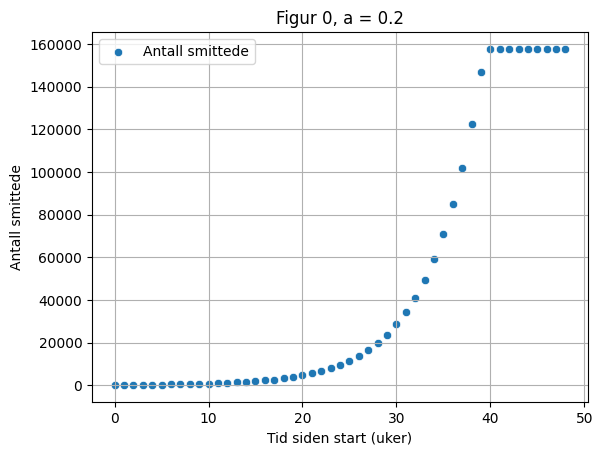

In [467]:
tider, smittede = modell_en(0.2, 100, 157759, 48)

ax = sns.scatterplot( x= tider, y = smittede, label = "Antall smittede")
plt.grid()
plt.legend()
ax.set_xlabel("Tid siden start (uker)")
ax.set_ylabel("Antall smittede")
plt.title(f"Figur {figur_nummer}, a = 0.2")
figur_nummer += 1
plt.show()

Figur 0 viser at utviklingen eksponensiell, vi ser at desto flere som er smittet, blir flere smittet. Utforsker sammenhengen mellom antall smittede til å starte med og a.

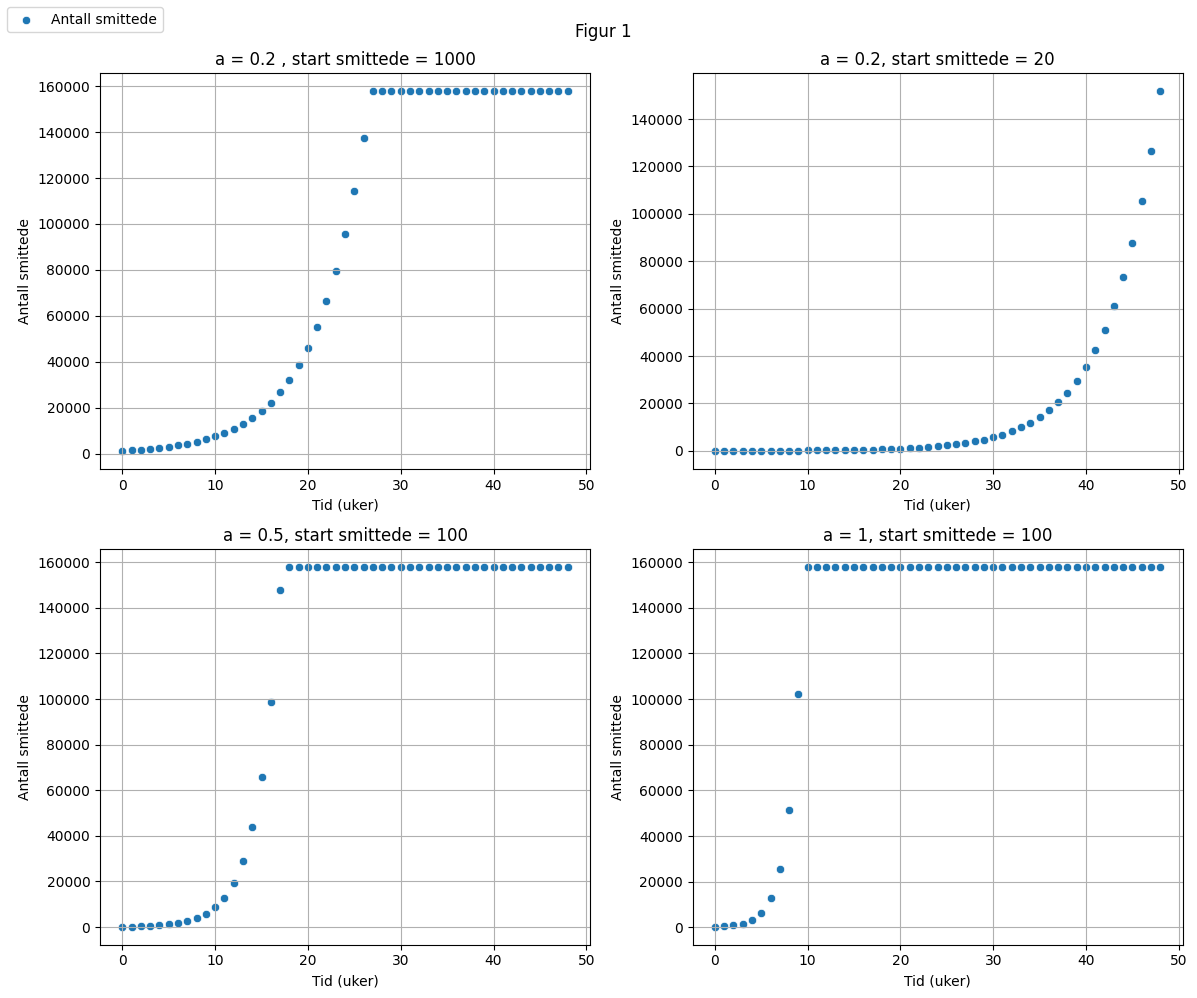

In [468]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # lager subplots
plt.suptitle(f"Figur {figur_nummer}")
figur_nummer +=1


# første subplot
tider, smittede = modell_en(0.2, 1000, 157759, 48)
sns.scatterplot(x=tider, y=smittede, ax=axes[0, 0])
axes[0, 0].set_title("a = 0.2 , start smittede = 1000")
axes[0, 0].set_xlabel("Tid (uker)")
axes[0, 0].set_ylabel("Antall smittede")
axes[0, 0].grid()

# andre subplot
tider, smittede = modell_en(0.2, 20, 157759, 48)
sns.scatterplot(x=tider, y=smittede, ax=axes[0, 1])
axes[0, 1].set_title("a = 0.2, start smittede = 20")
axes[0, 1].set_xlabel("Tid (uker)")
axes[0, 1].set_ylabel("Antall smittede")
axes[0, 1].grid()

#tredje subplot
tider, smittede = modell_en(0.5, 100, 157759, 48)
sns.scatterplot(x=tider, y=smittede, ax=axes[1, 0])
axes[1, 0].set_title("a = 0.5, start smittede = 100")
axes[1, 0].set_xlabel("Tid (uker)")
axes[1, 0].set_ylabel("Antall smittede")
axes[1, 0].grid()

# fjerde subbplot
tider, smittede = modell_en(1, 100, 157759, 48)
sns.scatterplot(x=tider, y=smittede, ax=axes[1, 1])
axes[1, 1].set_title("a = 1, start smittede = 100")
axes[1, 1].set_xlabel("Tid (uker)")
axes[1, 1].set_ylabel("Antall smittede")
axes[1, 1].grid()

fig.legend(["Antall smittede"], loc="upper left")
plt.tight_layout()
plt.show()

Figur 1 viser at det er mange flere som blir smittet ved høyer antall smittede til å starte med, men at "brattheten" på kurven er den samme dersom a er lik. Når a varierer, ser vi at brattheten og antall smitted øker dramatisk. Dette gir mening, med tanke på at a er et tall på hvor mange en syk person gjennomsnittlig smitter per uke. Om a er høy, så smitter individene, gjennomsnittlig, flere individer og da er det flere som kan smitte videre. Vi ser også at dersom a er høy, så er hele populasjonen smittet veldig fort, for a = 0.5 etter ca 18 uker og for a = 1 så etter 10 uker. Vi kan vidreutvikle modellen ved å legge til S, "susceptibles", altså mottakelighet:

### Modell II

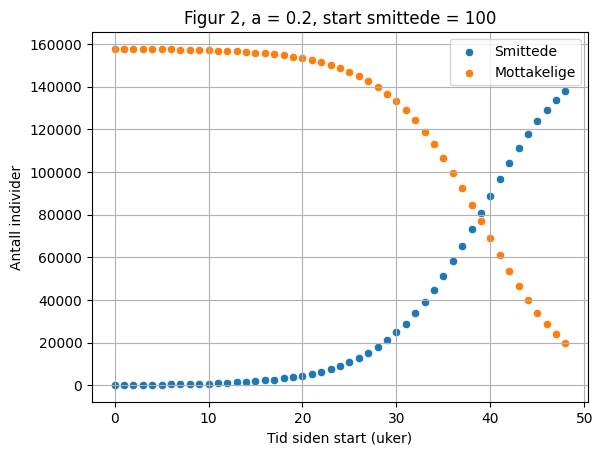

In [469]:
tider, smittede, mottakelige = modell_to(0.2, 100, 157759, 48)

ax = sns.scatterplot( x= tider, y = smittede, label = "Smittede")
ax = sns.scatterplot( x= tider, y = mottakelige, label = "Mottakelige")
plt.grid()
#plt.legend()
ax.set_xlabel("Tid siden start (uker)")
ax.set_ylabel("Antall individer")
plt.title(f"Figur {figur_nummer}, a = 0.2, start smittede = 100")
figur_nummer += 1
plt.show()

Figur 2 viser hvordan antall smittede og antall mottakelige utvikler seg, vi kan se at dersom mange er smittet, så kan færre bli smittet. Summen av smittede og mottakelige skal alltid være like stor som populasjonen, her 157759 indider. Denne modellen stemmer ganske bra med virkeligheten. Varierer kontaktrate og antall start-smittede:

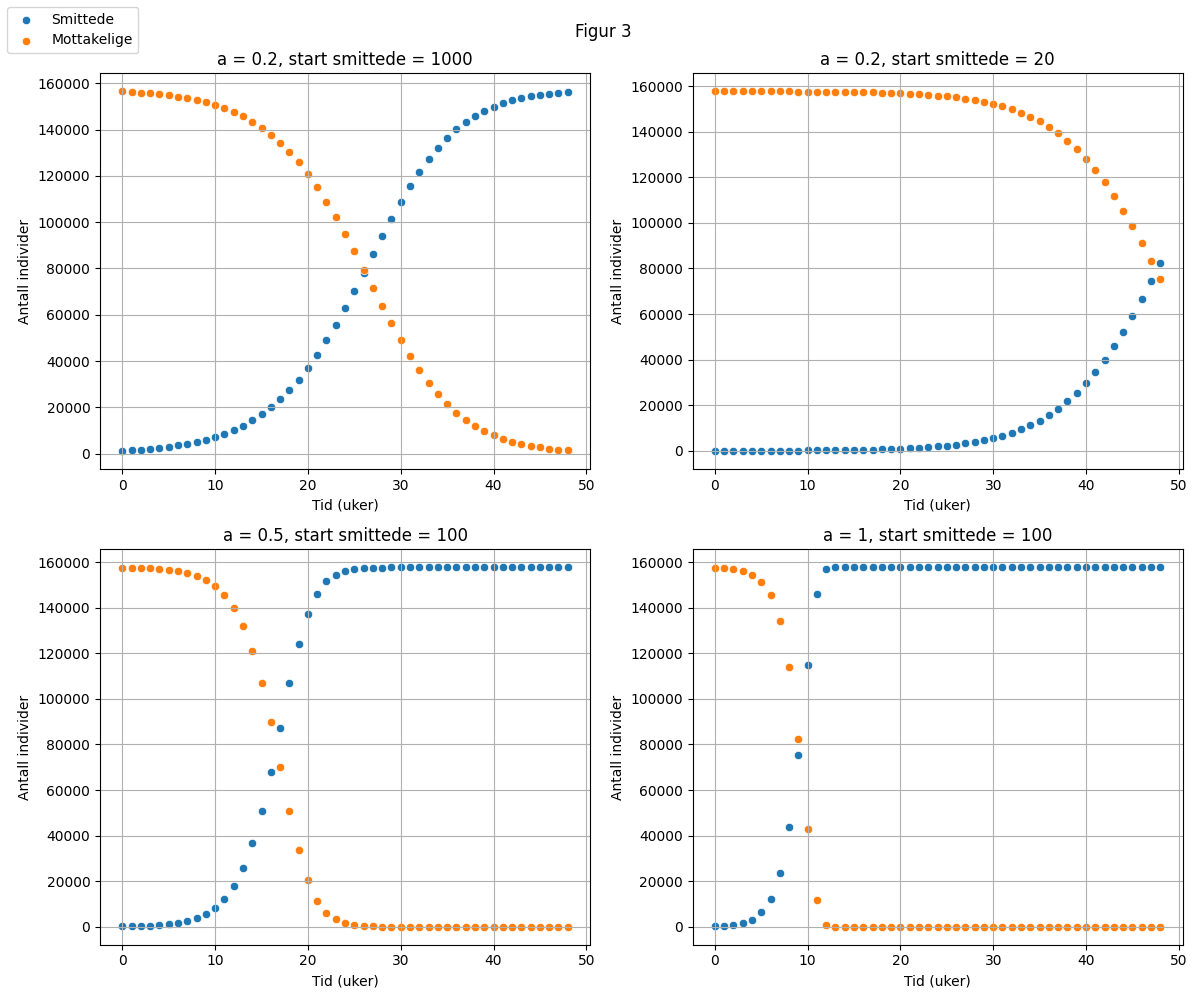

In [470]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Lager subplots
plt.suptitle(f"Figur {figur_nummer}")
figur_nummer += 1

# Første subplot
tider, smittede, mottakelige = modell_to(0.2, 1000, 157759, 48)
sns.scatterplot(x=tider, y=smittede, ax=axes[0, 0], label = "Smittede")
sns.scatterplot(x=tider, y=mottakelige, ax=axes[0, 0], label = "Mottakelige")
axes[0, 0].set_title("a = 0.2, start smittede = 1000")
axes[0, 0].set_xlabel("Tid (uker)")
axes[0, 0].set_ylabel("Antall individer")
axes[0, 0].grid()
axes[0, 0].legend().remove()

# Andre subplot
tider, smittede, mottakelige = modell_to(0.2, 20, 157759, 48)
sns.scatterplot(x=tider, y=smittede, ax=axes[0, 1])
sns.scatterplot(x=tider, y=mottakelige, ax=axes[0, 1])
axes[0, 1].set_title("a = 0.2, start smittede = 20")
axes[0, 1].set_xlabel("Tid (uker)")
axes[0, 1].set_ylabel("Antall individer")
axes[0, 1].grid()


# Tredje subplot
tider, smittede, mottakelige = modell_to(0.5, 100, 157759, 48)
sns.scatterplot(x=tider, y=smittede, ax=axes[1, 0])
sns.scatterplot(x=tider, y=mottakelige, ax=axes[1, 0])
axes[1, 0].set_title(f"a = 0.5, start smittede = 100")
axes[1, 0].set_xlabel("Tid (uker)")
axes[1, 0].set_ylabel("Antall individer")
axes[1, 0].grid()

# Fjerde subplot
tider, smittede, mottakelige = modell_to(1, 100, 157759, 48)
sns.scatterplot(x=tider, y=smittede, ax=axes[1, 1])
sns.scatterplot(x=tider, y=mottakelige, ax=axes[1, 1])
axes[1, 1].set_title(f"a = 1, start smittede = 100")
axes[1, 1].set_xlabel("Tid (uker)")
axes[1, 1].set_ylabel("Antall individer")
axes[1, 1].grid()
# Legg til en samlet beskrivelse
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper left")

plt.tight_layout()
plt.show()


Vi kan utifra Figur 3 se at, dersom a er høy så stiger antall smittede veldig fort, og hele befolkningen er og forblir smittet. Dersom antall smittede til å starte med er høy, 1000, så ser vi at vi er veldig nærme å få hele befolkningen smittet, men vi plotter ikke over lang nok tid. Vi ser også at dersom det er 20 individer som starter som smittet, så vil det i løpet av 48 uker være ca. halve befolkningen som er smittet. Ved å endre a, ser vi hva som skjer når de aller fleste blir smittet, mange blir smittet, men ikke alle. Et problem med denne modellen kan være at ingen blir friske, vi kan legge det til

### Modell III

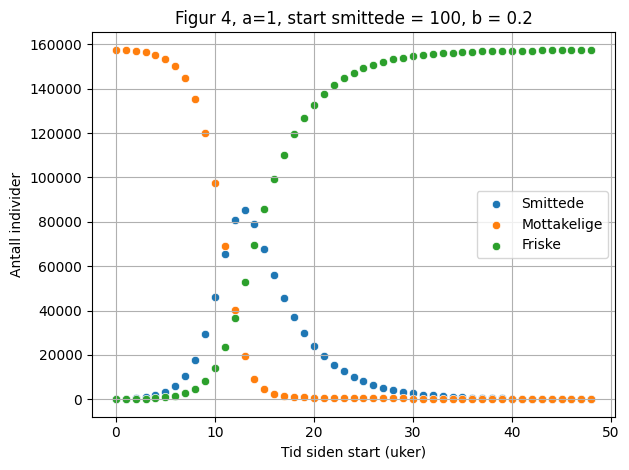

In [471]:
tider, smittede, mottakelige, friske = modell_tre(1, 100, 157759, 48, 0.2)

sns.scatterplot(x=tider, y=smittede, label="Smittede")
sns.scatterplot(x=tider, y=mottakelige, label="Mottakelige")
sns.scatterplot(x=tider, y=friske, label="Friske")

plt.grid()
plt.legend()
plt.xlabel("Tid siden start (uker)")
plt.ylabel("Antall individer")
plt.title(f"Figur {figur_nummer}, a=1, start smittede = 100, b = 0.2")
figur_nummer += 1
plt.tight_layout()
plt.show()

Figur 4 viser at det er mange som blir smittet i starten, helt til det når en topp, før det synker drastisk. Dette er nok fordi etter som det blir færre som kan bli smittet, så vil færre bli smittet, og de som alerede er smittet blir friske fortere enn de rekker å smitte andre. Dette vil gi en topp, relativt tidelig, før antall smittede nærmer seg null, den vil aldri nå null, men næreme seg. Vi ser også at ikke alle blir smittet, men at de fleste blir det. For å finne realistiske verdier for a og b, så kan vi for eksempel sammenlikne modellen vår med målinger fra virkeligheten. Dataen under er hentet fra "https://www.uio.no/studier/emner/matnat/ifi/IN-KJM1900/h20/datafiler/influensa.txt" og handler om antall type A-influensa (H3N2) tilfeller fra 2004-2005. Der start-tiden er første uka i oktober 2004. Det var 157759 testede. Starter med å plotte dataene

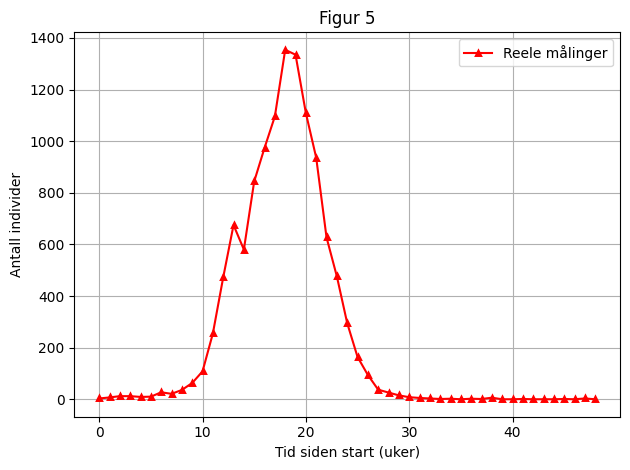

In [472]:
sns.lineplot(data=df, x="n", y="I", marker = "^", color = "r", label = "Reele målinger", markersize=3, markeredgewidth=2, markeredgecolor="r")
plt.grid()
plt.legend()
plt.xlabel("Tid siden start (uker)")
plt.ylabel("Antall individer")
plt.title(f"Figur {figur_nummer}")
plt.xticks(np.arange(0, 48, 10))
figur_nummer += 1
plt.tight_layout()
plt.show()

Bruker en optimaliserings algoritme for å finne a og b som passer best til dataene. Den bruker RMS-verdien til forskjellen mellom modellen og de reele dataene, som mål på nøyaktigheten til tillpassningen. Ser også at det starter med 3 syke, fra dataene

In [473]:
start_smittede = 3

In [481]:
true_y = df.iloc[:,1].values
true_t = df.iloc[:,0].values
def modell_error (x, true_y, true_t):
    a,b = x
    tider, smittede, mottakelige, friske = modell_tre(a, start_smittede, 157759, 48, b)
    assert (np.abs(tider - true_t)<1e-6).all()
    err = smittede - true_y
    return (np.sum(err**2))

x0 = np.array([0.5,0.5])
res = sp.optimize.minimize(modell_error, x0, args = (true_y,true_t), bounds = [(0,5),(0,5)])

Plotter modellen opp mot de reele dataene med disse verdiene for a og b

In [475]:
a = res.x[0]
b = res.x[1]

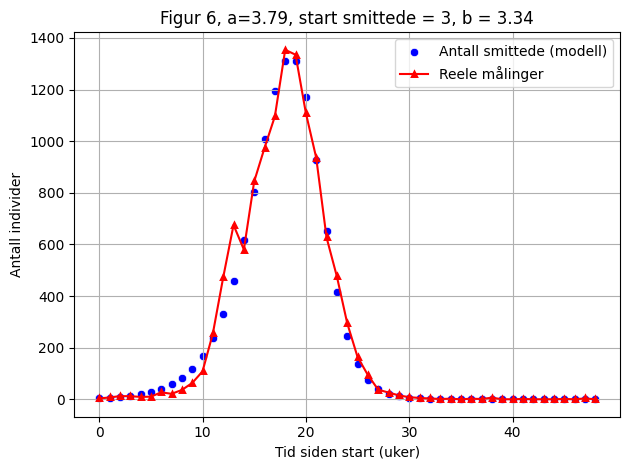

In [476]:
tider, smittede, mottakelige, friske = modell_tre(a, start_smittede, 157759, 48, b)
sns.scatterplot(x=tider, y=smittede, label = "Antall smittede (modell)", color = "blue")
sns.lineplot(data=df, x="n", y="I", marker = "^", color = "r", label = "Reele målinger", markersize=3, markeredgewidth=2, markeredgecolor="r")
plt.grid()
plt.legend()
plt.xlabel("Tid siden start (uker)")
plt.ylabel("Antall individer")
plt.title(f"Figur {figur_nummer}, a={round(a, 2)}, start smittede = {start_smittede}, b = {round(b, 2)}")
plt.xticks(np.arange(0, 48, 10))
figur_nummer += 1
plt.tight_layout()
plt.show()

Ser at verdiene som passer best for a og b, i dette tilfelle, er 3.79 og 3.34. Plotter videre modellen og de reele dataene samenliknet med hele populasjonen og antall friske.

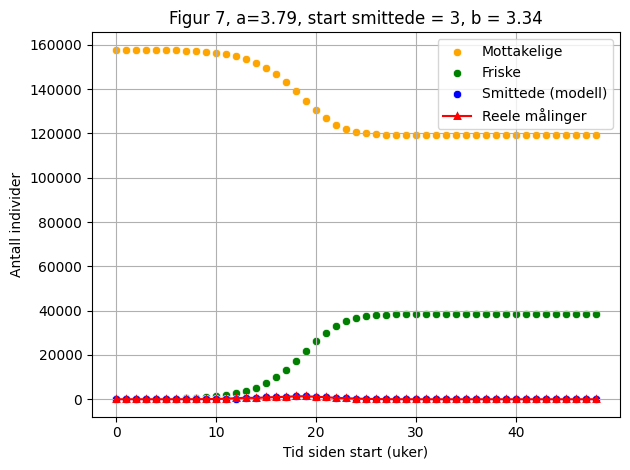

In [477]:
tider, smittede, mottakelige, friske = modell_tre(a, start_smittede, 157759, 48, b)
sns.scatterplot(x=tider, y=mottakelige, label="Mottakelige", color = "orange")
sns.scatterplot(x=tider, y=friske, label="Friske", color = "green")
sns.scatterplot(x=tider, y=smittede, label = "Smittede (modell)", color = "blue")
sns.lineplot(data=df, x="n", y="I", marker = "^", color = "r", label = "Reele målinger", markersize=3, markeredgewidth=2, markeredgecolor="r")
plt.grid()
plt.legend()
plt.xlabel("Tid siden start (uker)")
plt.ylabel("Antall individer")
plt.title(f"Figur {figur_nummer}, a={round(a, 2)}, start smittede = {start_smittede}, b = {round(b, 2)}")
plt.xticks(np.arange(0, 48, 10))
figur_nummer += 1
plt.tight_layout()
plt.show()

Vi ser her at, det relativt sett er få som blir smittet. Modellen passer også nesten helt perfekt! De blå punktene, modellen, er nesten helt identiske med de røde trekantene, de reele målingene. Figur 7 Viser også at ikke alle blir smittet, det er faktisk ganske få, ca. $40000/157759 \approx 25,4 \%$ av befolkningen har blitt syk på ett eller annet tidspunkt. Siden verdiene for a og b er fra reele data, så kan denne modellen brukes på generelt basis og ikke bare i dette tilfelle. Modellen vil da kunne finnes ved $$I_{t+1} = I_t + 3.79I_tS_t - 3.34I_t$$ Denne modellen vil da selfølgelig ikke fungere like bra der som her, fordi der vil være andre forhold. Du kan for eksempel være smittsom lengre, sykdommen kan smitte lettere, eller flere kan starte som syke.

### Modell IV

Vaksiner kan redusere smitte betydelig, bruker en modell med vaksiner:

Plotter med vaksinasjonsprosent = 10

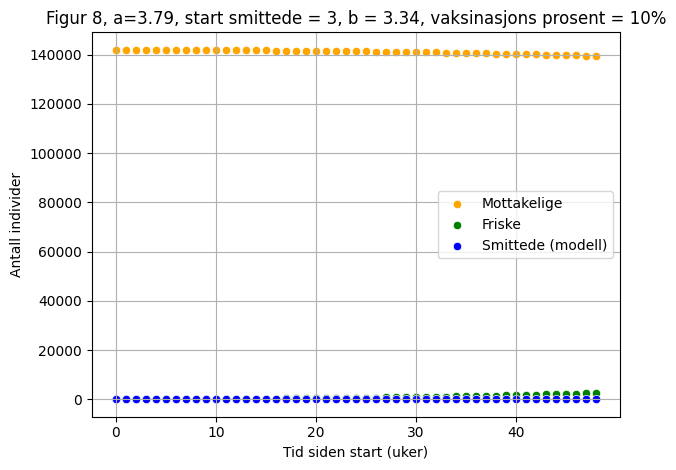

In [478]:
Vaksinasjonsprosent = 10
tider, smittede, mottakelige, friske = modell_fire(a, start_smittede, 157759, 48, b, Vaksinasjonsprosent)

sns.scatterplot(x=tider, y=mottakelige, label="Mottakelige", color = "orange")
sns.scatterplot(x=tider, y=friske, label="Friske", color = "green")
sns.scatterplot(x=tider, y=smittede, label = "Smittede (modell)", color = "blue")

plt.grid()
plt.legend()
plt.xlabel("Tid siden start (uker)")
plt.ylabel("Antall individer")
plt.title(f"Figur {figur_nummer}, a={round(a, 2)}, start smittede = {start_smittede}, b = {round(b, 2)}, vaksinasjons prosent = {Vaksinasjonsprosent}%")
figur_nummer += 1
plt.xticks(np.arange(0, 48, 10))

plt.tight_layout()
plt.show()
#print(smittede, mottakelige, friske)

Figur 8 viser en ganske annen modell enn den vi ser i figur 7, selv om a, b, start smittede er likt. Forskjellen er da bare grunnet vaskineringen. Plotter derfor ulike vakisnasjons prosenter:

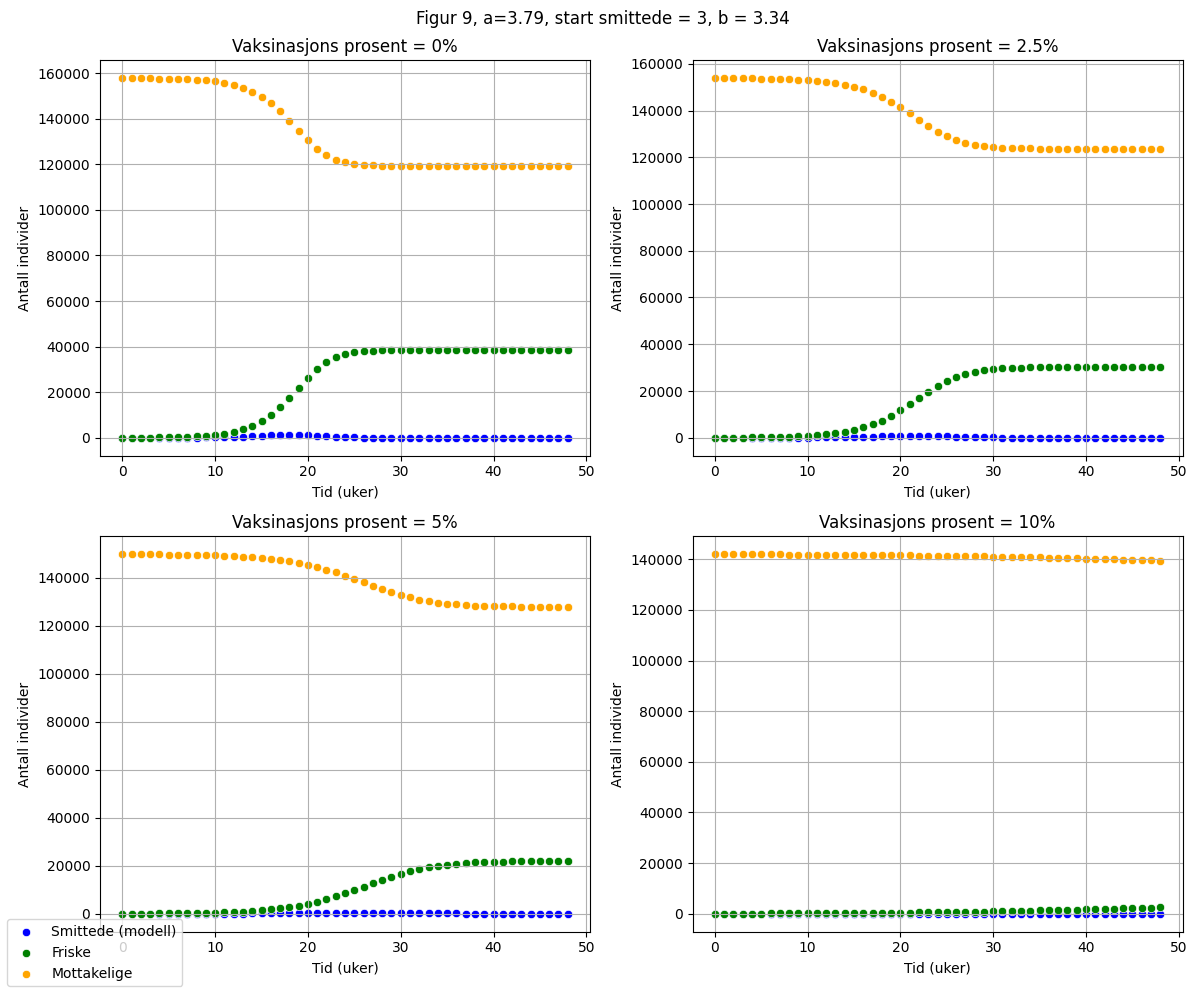

In [479]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Lager subplots
plt.suptitle(f"Figur {figur_nummer}, a={round(a, 2)}, start smittede = {start_smittede}, b = {round(b, 2)}")
figur_nummer += 1

# Første subplot
Vaksinasjonsprosent = 0 
tider, smittede, mottakelige, friske = modell_fire(a, start_smittede, 157759, 48, b, Vaksinasjonsprosent)
sns.scatterplot(x=tider, y=smittede, label = "Smittede (modell)", color = "blue", ax=axes[0,0])
sns.scatterplot(x=tider, y=friske, label="Friske", color = "green", ax=axes[0,0])
sns.scatterplot(x=tider, y=mottakelige, label="Mottakelige", color = "orange", ax=axes[0,0])
axes[0, 0].set_title(f"Vaksinasjons prosent = {Vaksinasjonsprosent}%")
axes[0, 0].set_xlabel("Tid (uker)")
axes[0, 0].set_ylabel("Antall individer")
axes[0, 0].grid()
axes[0, 0].legend().remove()

# Andre subplot
Vaksinasjonsprosent = 2.5
tider, smittede, mottakelige, friske = modell_fire(a, start_smittede, 157759, 48, b, Vaksinasjonsprosent)
sns.scatterplot(x=tider, y=smittede, color = "blue", ax=axes[0,1])
sns.scatterplot(x=tider, y=friske, color = "green", ax=axes[0,1])
sns.scatterplot(x=tider, y=mottakelige, color = "orange", ax=axes[0,1])
axes[0, 1].set_title(f"Vaksinasjons prosent = {Vaksinasjonsprosent}%")
axes[0, 1].set_xlabel("Tid (uker)")
axes[0, 1].set_ylabel("Antall individer")
axes[0, 1].grid()


# Tredje subplot
Vaksinasjonsprosent = 5
tider, smittede, mottakelige, friske = modell_fire(a, start_smittede, 157759, 48, b, Vaksinasjonsprosent)
sns.scatterplot(x=tider, y=smittede, color = "blue", ax=axes[1,0])
sns.scatterplot(x=tider, y=friske, color = "green", ax=axes[1,0])
sns.scatterplot(x=tider, y=mottakelige, color = "orange", ax=axes[1,0])
axes[1, 0].set_title(f"Vaksinasjons prosent = {Vaksinasjonsprosent}%")
axes[1, 0].set_xlabel("Tid (uker)")
axes[1, 0].set_ylabel("Antall individer")
axes[1, 0].grid()

# Fjerde subplot
Vaksinasjonsprosent = 10
tider, smittede, mottakelige, friske = modell_fire(a, start_smittede, 157759, 48, b, Vaksinasjonsprosent)
sns.scatterplot(x=tider, y=smittede, color = "blue", ax=axes[1,1])
sns.scatterplot(x=tider, y=friske, color = "green", ax=axes[1,1])
sns.scatterplot(x=tider, y=mottakelige, color = "orange", ax=axes[1,1])
axes[1, 1].set_title(f"Vaksinasjons prosent = {Vaksinasjonsprosent}%")
axes[1, 1].set_xlabel("Tid (uker)")
axes[1, 1].set_ylabel("Antall individer")
axes[1, 1].grid()
# Legg til en samlet beskrivelse
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower left")

plt.tight_layout()
plt.show()

Vi ser at med vaksinasjons prosent = 0, så er utviklingen lik som i figur 7. Vi ser også at smitten forsinkes veldig, selv ved lave vaksinasjons prosenter. 10%, som er det meste jeg har plottet i figur 9, er ganske lite, antall mottakelige blir da redusert med 10%. Jeg er overasket over hvor mye effekt en såpass liten vaksinasjonsgrad har på smitte trykket.

#### Konklusjon

Jeg ser utifra modell I at dersom a blir høyere, vil brattheten på kurven stige, og motsatt om a minker. Dersom start smittede øker vil hele populasjonen bli smittet. Modell II viser hvordan antall nye smittede hører sammen med mottakelige og viser sammenhengen mellom antall smittede og mottakelige. Modell III Viser hvordan en bedringsrate påvirker smitteutviklingen, samt viser hvordan smittede, mottakelige og friske henger sammen. Modell IV er nok den mest nøyaktige av modellene, men alle sammen har fordeler og ulemper. Fordelene går for det meste ut på tiden det tar å lage dem og ulempene på virkelighetsnærhet. Et problem med modell IV er at $b>1$, noe som er litt urealsitisk. Et eksempel på dette kan være, at du stenger alle syke inne, de smitter ingen, da er a = 0, og b vil fortsatt være 3.34, dette betyr at på en uke så er tre ganger så mange friske som du hadde syke, noen av de usmittede er altså blitt friske?! Dette virker som en ulempe med denne modellen, dette hadde nok løst seg dersom $\Delta t$ var mindre, for eksempel dager eller timer, men ikke uker. Da hadde $b<1$. Jeg har sammenliknet modellene med et reelet datasett og funnet, basert må mine modeller, at kontaktraten burde være 3.79 per uke og bedringsraten burde være ca. 3.34 per uke. Modellene er nettop det, modeller, så de tillnærmer seg bare vikeligheten, det er ikke absolutt. Dersom jeg skulle brukt modellene mine på andre smitteutbrudd, ville jeg nok fått noe anderledes tall, det kommer an på smittsomheten, hvor mye individene reiser, hvor fort de blir friske etc. Jeg ble overasket over hvor mye en relativt lav vaksinasjonsgrad påvirket smitte trykket.